In [3]:
# Importing Libraries
import pandas as pd           # For data manipulation
import numpy as np            # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns         # For advanced visualizations
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling
from sklearn.model_selection import train_test_split  # For splitting the dataset

# Setting up the visual style
sns.set(style="whitegrid")


In [8]:
from google.colab import files


# Upload the CSV file from your desktop
uploaded = files.upload()

# Load the CSV into a Pandas DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# Display the first few rows of the dataframe
print(df.head())


Saving student-mat.csv to student-mat (2).csv
  school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"he

In [9]:
# Loading the dataset
df = pd.read_csv('student-mat.csv', sep=';')  # The separator in the CSV is a semicolon

# Displaying the first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
# Checking for missing values
missing_values = df.isnull().sum()

# Displaying missing values
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


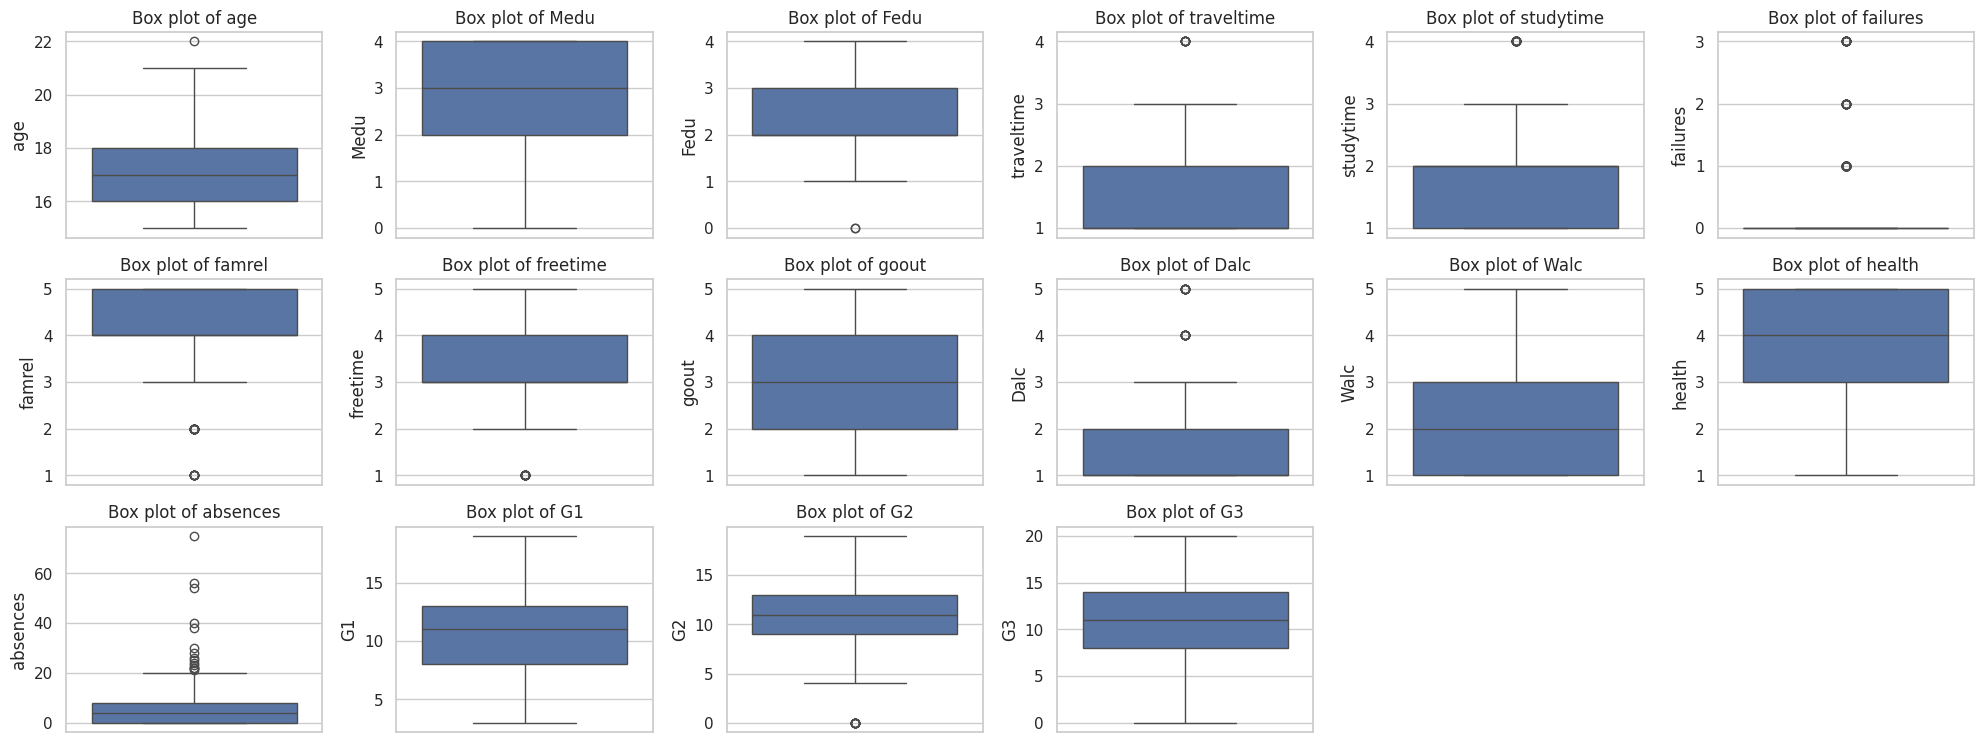

In [11]:
# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plotting box plots for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


In [12]:
# Calculating IQR for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f'Number of outliers in {col}: {outlier_count}')


Number of outliers in age: 1
Number of outliers in Medu: 0
Number of outliers in Fedu: 2
Number of outliers in traveltime: 8
Number of outliers in studytime: 27
Number of outliers in failures: 83
Number of outliers in famrel: 26
Number of outliers in freetime: 19
Number of outliers in goout: 0
Number of outliers in Dalc: 18
Number of outliers in Walc: 0
Number of outliers in health: 0
Number of outliers in absences: 15
Number of outliers in G1: 0
Number of outliers in G2: 13
Number of outliers in G3: 0


In [14]:
# Calculating IQR bounds for 'age'
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

print(f"'age' - Q1: {Q1_age}, Q3: {Q3_age}, IQR: {IQR_age}")
print(f"'age' - Lower Bound: {lower_bound_age}, Upper Bound: {upper_bound_age}\n")

# Calculating IQR bounds for 'Fedu'
Q1_fedu = df['Fedu'].quantile(0.25)
Q3_fedu = df['Fedu'].quantile(0.75)
IQR_fedu = Q3_fedu - Q1_fedu
lower_bound_fedu = Q1_fedu - 1.5 * IQR_fedu
upper_bound_fedu = Q3_fedu + 1.5 * IQR_fedu

print(f"'Fedu' - Q1: {Q1_fedu}, Q3: {Q3_fedu}, IQR: {IQR_fedu}")
print(f"'Fedu' - Lower Bound: {lower_bound_fedu}, Upper Bound: {upper_bound_fedu}")



'age' - Q1: 16.0, Q3: 18.0, IQR: 2.0
'age' - Lower Bound: 13.0, Upper Bound: 21.0

'Fedu' - Q1: 2.0, Q3: 3.0, IQR: 1.0
'Fedu' - Lower Bound: 0.5, Upper Bound: 4.5


In [15]:
# Removing outliers for 'age'
df = df[(df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age)]

# Removing outliers for 'Fedu'
df = df[(df['Fedu'] >= lower_bound_fedu) & (df['Fedu'] <= upper_bound_fedu)]

print("Outliers removed based on 'age' and 'Fedu' bounds.")
print(f"Updated dataset shape: {df.shape}")


Outliers removed based on 'age' and 'Fedu' bounds.
Updated dataset shape: (392, 33)


In [16]:
from scipy.stats.mstats import winsorize

# Capping 'traveltime' at the 5th and 95th percentiles
df['traveltime'] = winsorize(df['traveltime'], limits=[0.05, 0.05])

# Capping 'G2' at the 5th and 95th percentiles
df['G2'] = winsorize(df['G2'], limits=[0.05, 0.05])

# Repeat the same for other features with moderate outliers
features_to_winsorize = ['absences', 'Dalc', 'famrel', 'freetime']
for feature in features_to_winsorize:
    df[feature] = winsorize(df[feature], limits=[0.05, 0.05])

# Verifying the changes
df[['traveltime', 'G2', 'absences', 'Dalc', 'famrel', 'freetime']].describe()


,traveltime,G2,absences,Dalc,famrel,freetime
count,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.42602,10.831633,5.112245,1.410714,3.964286,3.280612
std,0.63539,3.282476,5.561804,0.680144,0.839407,0.911889
min,1.00000,5.000000,0.000000,1.000000,2.000000,2.000000
25%,1.00000,9.000000,0.000000,1.000000,4.000000,3.000000
50%,1.00000,11.000000,4.000000,1.000000,4.000000,3.000000
75%,2.00000,13.000000,8.000000,2.000000,5.000000,4.000000
max,3.00000,17.000000,19.000000,3.000000,5.000000,5.000000


In [17]:
# Since 'failures' is ordinal, consider keeping it as is
# Alternatively, you can transform 'failures' into categorical bins

# Example: Capping 'failures' at 3
df['failures'] = np.where(df['failures'] > 3, 4, df['failures'])

# Verify the transformation
print(df['failures'].value_counts())


failures
0    310
1     50
2     17
3     15
Name: count, dtype: int64


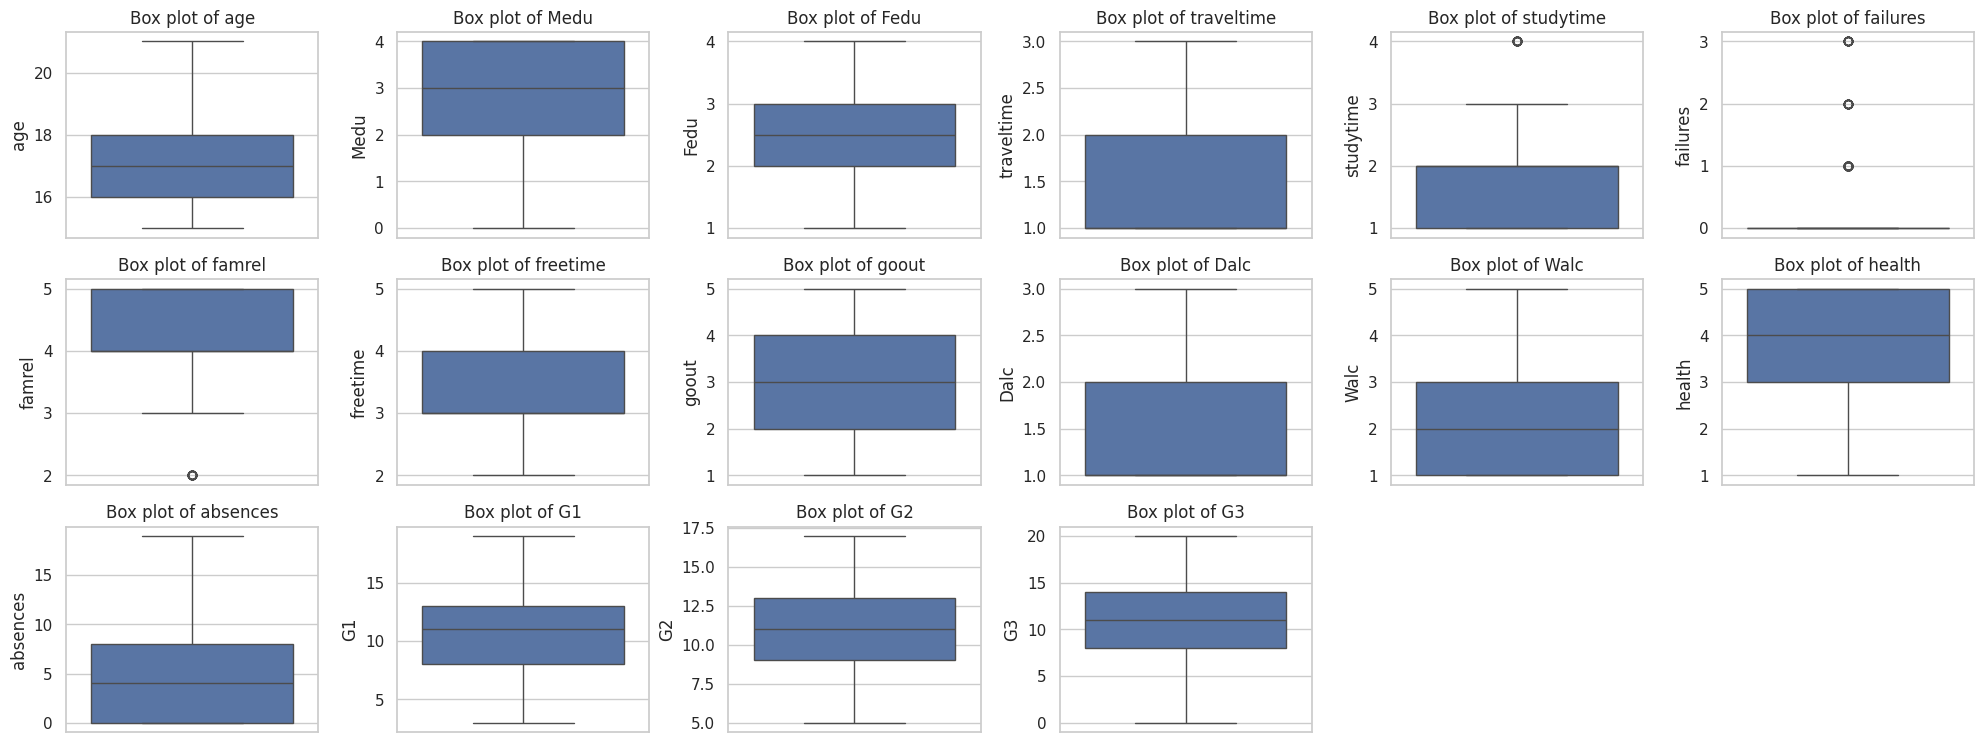

In [18]:
# Plotting box plots after handling outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


In [19]:
print("Dataset shape after handling outliers:", df.shape)

Dataset shape after handling outliers: (392, 33)


In [20]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:\n", categorical_cols)


Categorical Columns:
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [21]:
# Initializing LabelEncoder
le = LabelEncoder()

# Encoding categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Verifying the encoding
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [22]:
# Initializing StandardScaler
scaler = StandardScaler()

# Selecting features to scale (all numerical features excluding the target variable)
features_to_scale = numerical_cols.copy()
features_to_scale.remove('G3')  # 'G3' is the target variable

# Applying StandardScaler
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Verifying the scaling
df.head()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1.051101,1,0,0,1.144622,1.362129,0,4,...,0.042601,-0.308120,0.803946,-0.604635,-1.007984,-0.411785,0.159820,-1.783640,-1.473829,6
1,0,0,0.249483,1,0,1,-1.602471,-1.433445,0,2,...,1.235442,-0.308120,-0.096473,-0.604635,-1.007984,-0.411785,-0.200235,-1.783640,-1.778866,6
2,0,0,-1.353752,1,1,1,-1.602471,-1.433445,0,2,...,0.042601,-0.308120,-0.996893,0.867520,0.553794,-0.411785,0.879931,-1.180633,-0.863754,10
3,0,0,-1.353752,1,0,1,1.144622,-0.501587,1,3,...,-1.150239,-1.406146,-0.996893,-0.604635,-1.007984,1.035925,-0.560290,1.231396,0.966471,15
4,0,0,-0.552135,1,0,1,0.228924,0.430271,2,2,...,0.042601,-0.308120,-0.996893,-0.604635,-0.227095,1.035925,-0.200235,-1.482136,-0.253679,10


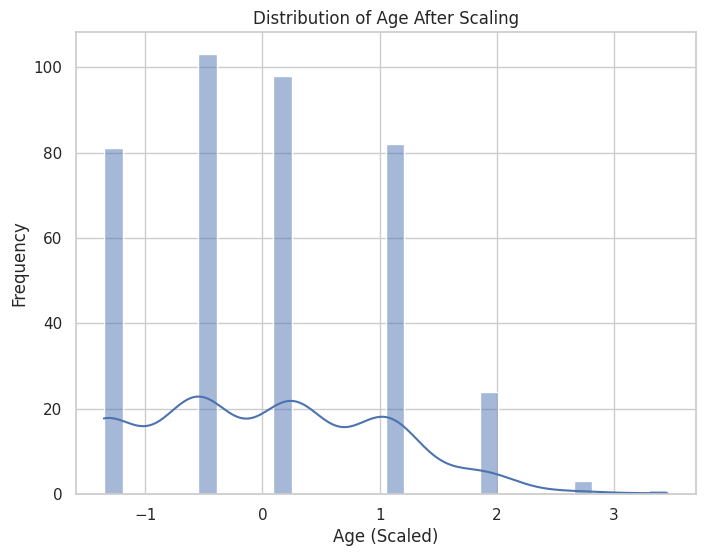

In [23]:
# Plotting the distribution of 'age' after scaling
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age After Scaling')
plt.xlabel('Age (Scaled)')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Defining features and target
X = df.drop('G3', axis=1)  # Features
y = df['G3']               # Target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42  # 70% training, 30% testing
)

# Verifying the split
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (274, 32)
Testing Features Shape: (118, 32)
Training Labels Shape: (274,)
Testing Labels Shape: (118,)


In [25]:
# Saving the preprocessed data to a new CSV file
df.to_csv('student-mat-preprocessed.csv', index=False)

print("\nPreprocessed data saved as 'student-mat-preprocessed.csv'")



Preprocessed data saved as 'student-mat-preprocessed.csv'


In [1]:
%matplotlib inline

In [6]:
from google.colab import files
uploaded = files.upload()

Saving student-mat-preprocessed.csv to student-mat-preprocessed.csv


In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# To display plots inline
%matplotlib inline

In [8]:
# Loading the preprocessed dataset
df = pd.read_csv('student-mat-preprocessed.csv')

# Displaying the first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1.051101,1,0,0,1.144622,1.362129,0,4,...,0.042601,-0.308120,0.803946,-0.604635,-1.007984,-0.411785,0.159820,-1.783640,-1.473829,6
1,0,0,0.249483,1,0,1,-1.602471,-1.433445,0,2,...,1.235442,-0.308120,-0.096473,-0.604635,-1.007984,-0.411785,-0.200235,-1.783640,-1.778866,6
2,0,0,-1.353752,1,1,1,-1.602471,-1.433445,0,2,...,0.042601,-0.308120,-0.996893,0.867520,0.553794,-0.411785,0.879931,-1.180633,-0.863754,10
3,0,0,-1.353752,1,0,1,1.144622,-0.501587,1,3,...,-1.150239,-1.406146,-0.996893,-0.604635,-1.007984,1.035925,-0.560290,1.231396,0.966471,15
4,0,0,-0.552135,1,0,1,0.228924,0.430271,2,2,...,0.042601,-0.308120,-0.996893,-0.604635,-0.227095,1.035925,-0.200235,-1.482136,-0.253679,10


In [9]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,392.000000,392.000000,3.920000e+02,392.000000,392.000000,392.000000,3.920000e+02,3.920000e+02,392.000000,392.000000,...,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,392.000000
mean,0.117347,0.469388,2.900174e-16,0.775510,0.290816,0.895408,-1.812609e-17,-1.993870e-16,2.163265,2.280612,...,-1.778623e-16,-1.223511e-16,5.437827e-17,-8.156741e-17,-1.359457e-17,9.063045e-17,9.063045e-18,1.268826e-16,2.650941e-16,10.408163
std,0.322245,0.499700,1.001278e+00,0.417779,0.454719,0.306418,1.001278e+00,1.001278e+00,1.227926,0.865852,...,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,4.588625
min,0.000000,0.000000,-1.353752e+00,0.000000,0.000000,0.000000,-2.518169e+00,-1.433445e+00,0.000000,0.000000,...,-2.343079e+00,-1.406146e+00,-1.897312e+00,-6.046354e-01,-1.007984e+00,-1.859495e+00,-9.203450e-01,-2.386647e+00,-1.778866e+00,0.000000
25%,0.000000,0.000000,-5.521345e-01,1.000000,0.000000,1.000000,-6.867734e-01,-5.015868e-01,2.000000,2.000000,...,4.260143e-02,-3.081196e-01,-9.968928e-01,-6.046354e-01,-1.007984e+00,-4.117848e-01,-9.203450e-01,-8.791291e-01,-5.587165e-01,8.000000
50%,0.000000,0.000000,2.494830e-01,1.000000,0.000000,1.000000,2.289245e-01,-3.565783e-02,2.000000,2.000000,...,4.260143e-02,-3.081196e-01,-9.647350e-02,-6.046354e-01,-2.270952e-01,3.120701e-01,-2.002347e-01,2.538168e-02,5.135834e-02,11.000000
75%,0.000000,1.000000,1.051101e+00,1.000000,1.000000,1.000000,1.144622e+00,4.302712e-01,3.000000,3.000000,...,1.235442e+00,7.899067e-01,8.039458e-01,8.675204e-01,5.537937e-01,1.035925e+00,5.198755e-01,6.283889e-01,6.614331e-01,14.000000
max,1.000000,1.000000,3.455953e+00,1.000000,1.000000,1.000000,1.144622e+00,1.362129e+00,4.000000,4.000000,...,1.235442e+00,1.887933e+00,1.704365e+00,2.339676e+00,2.115571e+00,1.035925e+00,2.500179e+00,2.437410e+00,1.881583e+00,20.000000


In [1]:
df.info()

NameError: name 'df' is not defined

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student-mat-preprocessed.csv to student-mat-preprocessed.csv


In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# To display plots inline
%matplotlib inline

In [5]:
# Loading the preprocessed dataset
df = pd.read_csv('student-mat-preprocessed.csv')

df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,392.000000,392.000000,3.920000e+02,392.000000,392.000000,392.000000,3.920000e+02,3.920000e+02,392.000000,392.000000,...,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,392.000000
mean,0.117347,0.469388,2.900174e-16,0.775510,0.290816,0.895408,-1.812609e-17,-1.993870e-16,2.163265,2.280612,...,-1.778623e-16,-1.223511e-16,5.437827e-17,-8.156741e-17,-1.359457e-17,9.063045e-17,9.063045e-18,1.268826e-16,2.650941e-16,10.408163
std,0.322245,0.499700,1.001278e+00,0.417779,0.454719,0.306418,1.001278e+00,1.001278e+00,1.227926,0.865852,...,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,4.588625
min,0.000000,0.000000,-1.353752e+00,0.000000,0.000000,0.000000,-2.518169e+00,-1.433445e+00,0.000000,0.000000,...,-2.343079e+00,-1.406146e+00,-1.897312e+00,-6.046354e-01,-1.007984e+00,-1.859495e+00,-9.203450e-01,-2.386647e+00,-1.778866e+00,0.000000
25%,0.000000,0.000000,-5.521345e-01,1.000000,0.000000,1.000000,-6.867734e-01,-5.015868e-01,2.000000,2.000000,...,4.260143e-02,-3.081196e-01,-9.968928e-01,-6.046354e-01,-1.007984e+00,-4.117848e-01,-9.203450e-01,-8.791291e-01,-5.587165e-01,8.000000
50%,0.000000,0.000000,2.494830e-01,1.000000,0.000000,1.000000,2.289245e-01,-3.565783e-02,2.000000,2.000000,...,4.260143e-02,-3.081196e-01,-9.647350e-02,-6.046354e-01,-2.270952e-01,3.120701e-01,-2.002347e-01,2.538168e-02,5.135834e-02,11.000000
75%,0.000000,1.000000,1.051101e+00,1.000000,1.000000,1.000000,1.144622e+00,4.302712e-01,3.000000,3.000000,...,1.235442e+00,7.899067e-01,8.039458e-01,8.675204e-01,5.537937e-01,1.035925e+00,5.198755e-01,6.283889e-01,6.614331e-01,14.000000
max,1.000000,1.000000,3.455953e+00,1.000000,1.000000,1.000000,1.144622e+00,1.362129e+00,4.000000,4.000000,...,1.235442e+00,1.887933e+00,1.704365e+00,2.339676e+00,2.115571e+00,1.035925e+00,2.500179e+00,2.437410e+00,1.881583e+00,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      392 non-null    int64  
 1   sex         392 non-null    int64  
 2   age         392 non-null    float64
 3   address     392 non-null    int64  
 4   famsize     392 non-null    int64  
 5   Pstatus     392 non-null    int64  
 6   Medu        392 non-null    float64
 7   Fedu        392 non-null    float64
 8   Mjob        392 non-null    int64  
 9   Fjob        392 non-null    int64  
 10  reason      392 non-null    int64  
 11  guardian    392 non-null    int64  
 12  traveltime  392 non-null    float64
 13  studytime   392 non-null    float64
 14  failures    392 non-null    float64
 15  schoolsup   392 non-null    int64  
 16  famsup      392 non-null    int64  
 17  paid        392 non-null    int64  
 18  activities  392 non-null    int64  
 19  nursery     392 non-null    i

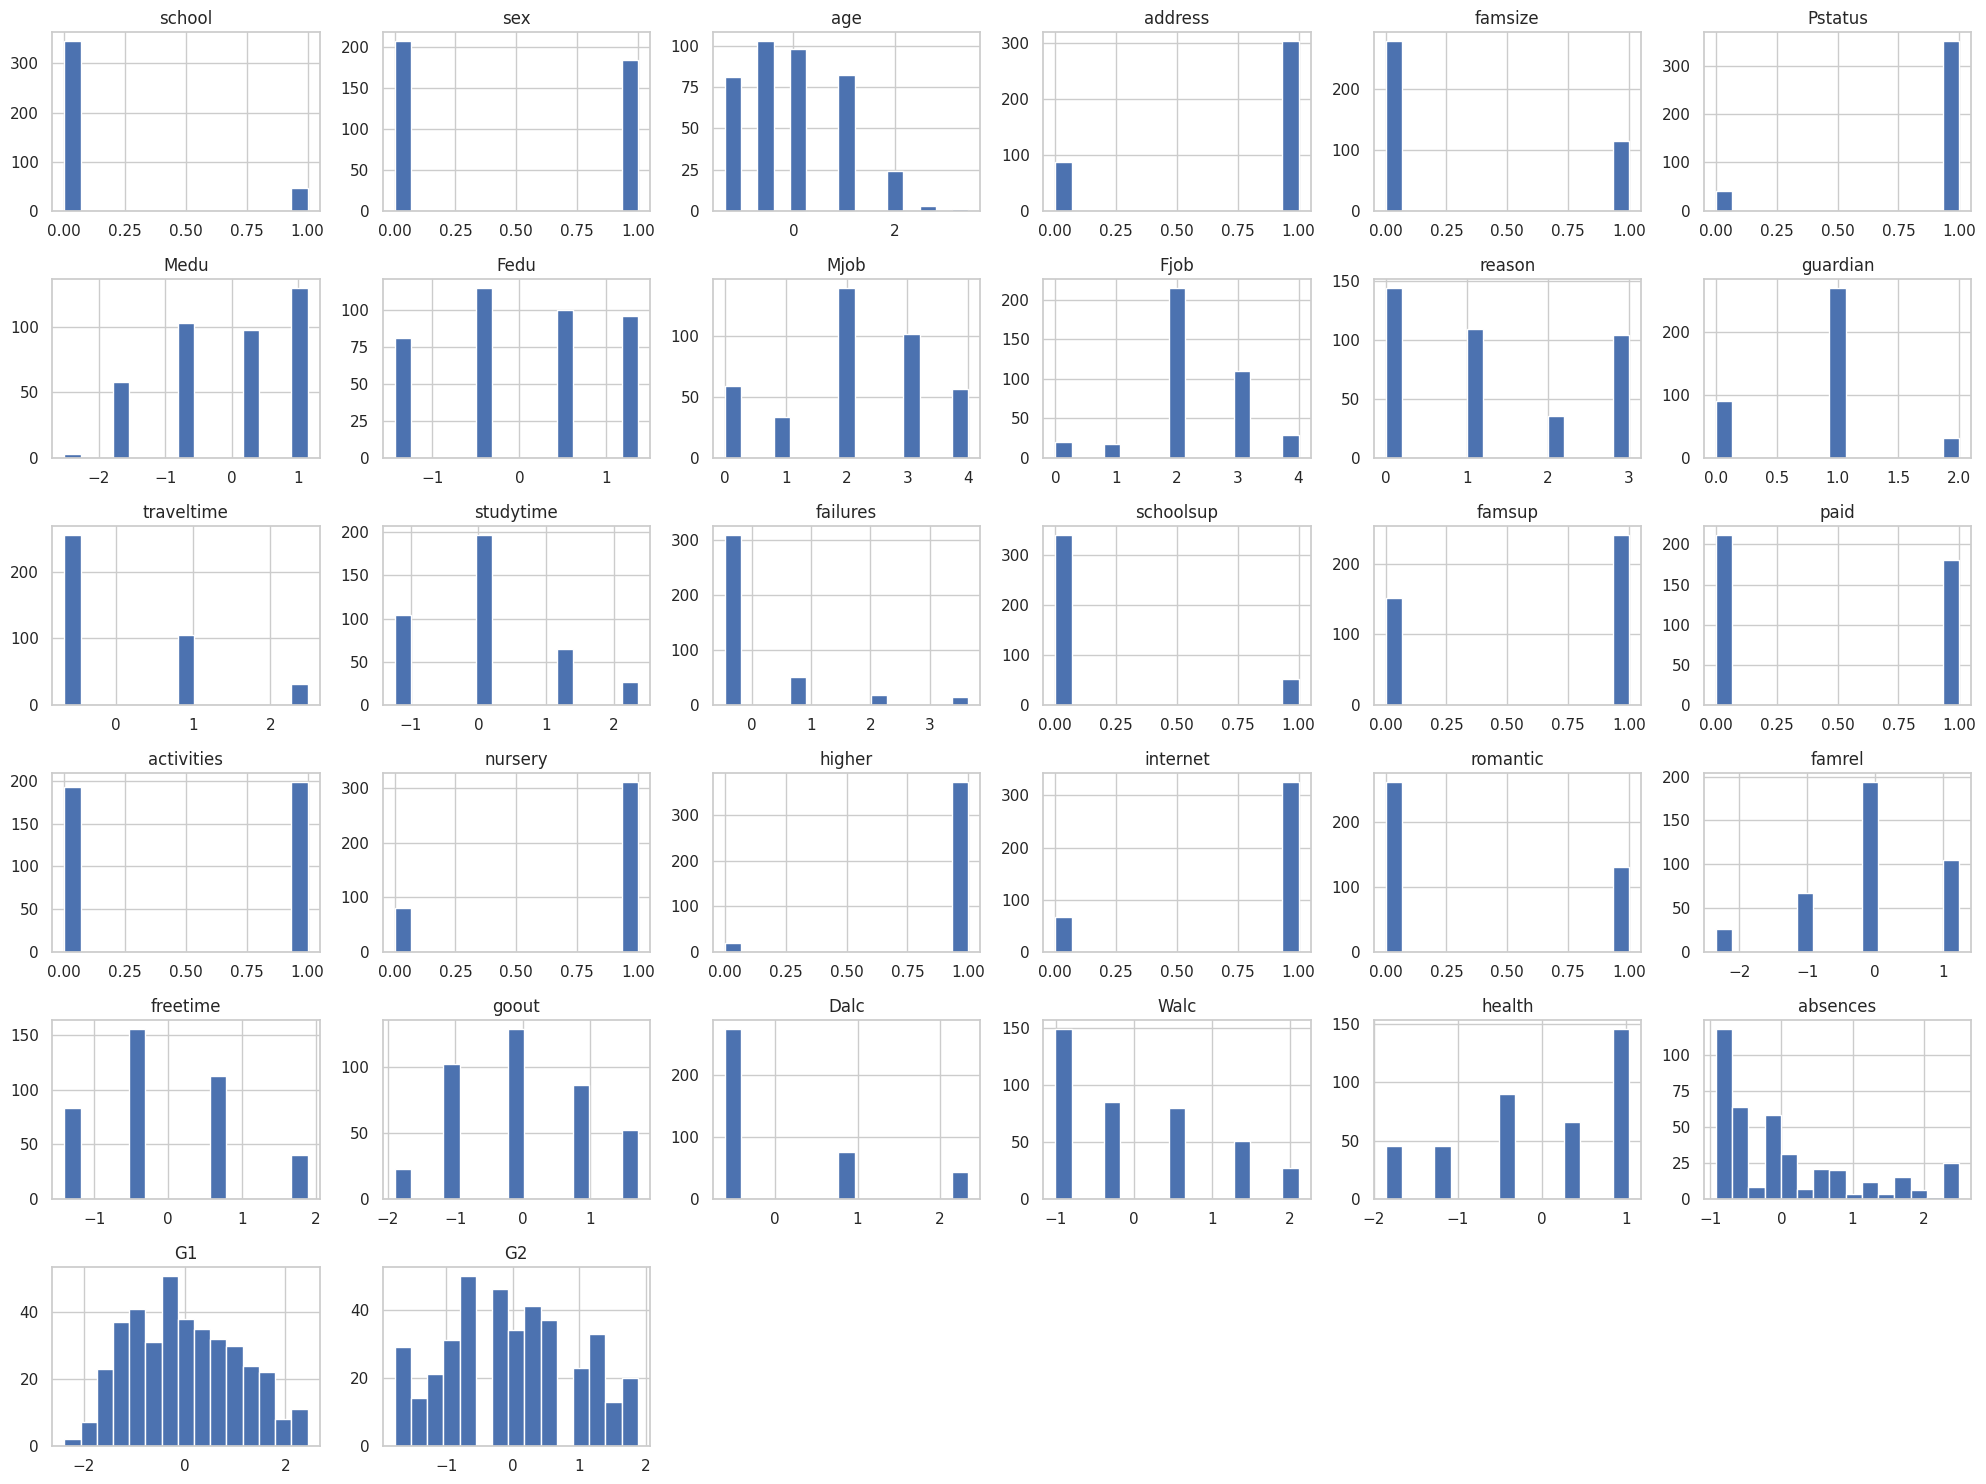

In [7]:
# Selecting numerical columns (excluding target variable 'G3')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('G3')  # Exclude target variable

# Plotting histograms
df[numerical_cols].hist(bins=15, figsize=(20, 15), layout=(6, 6))
plt.tight_layout()
plt.show()


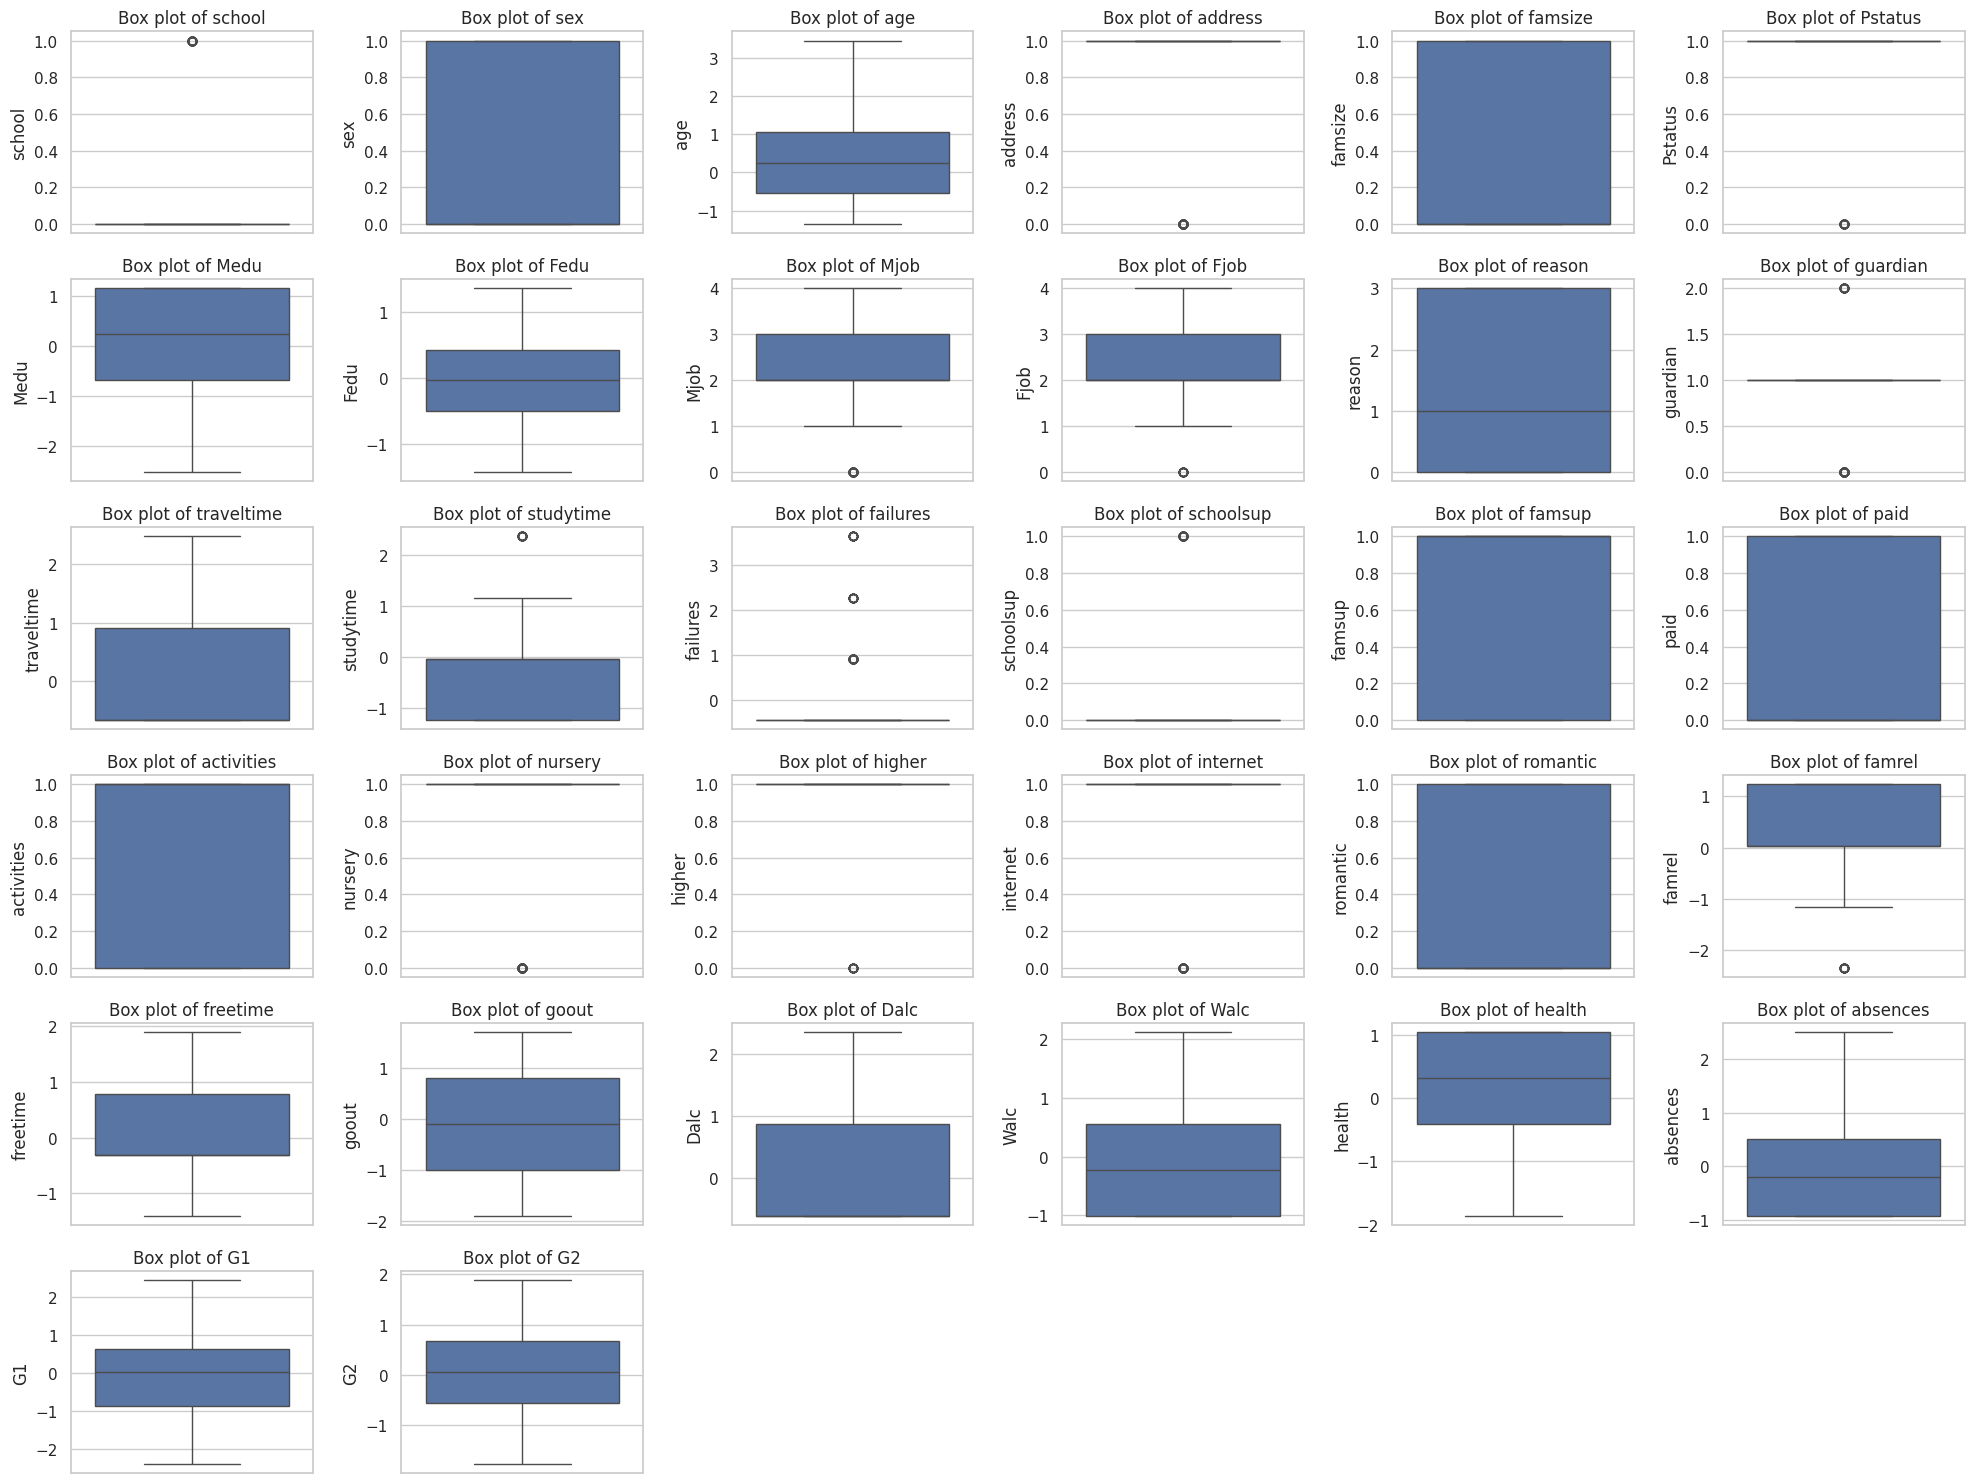

In [8]:
# Plotting box plots for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

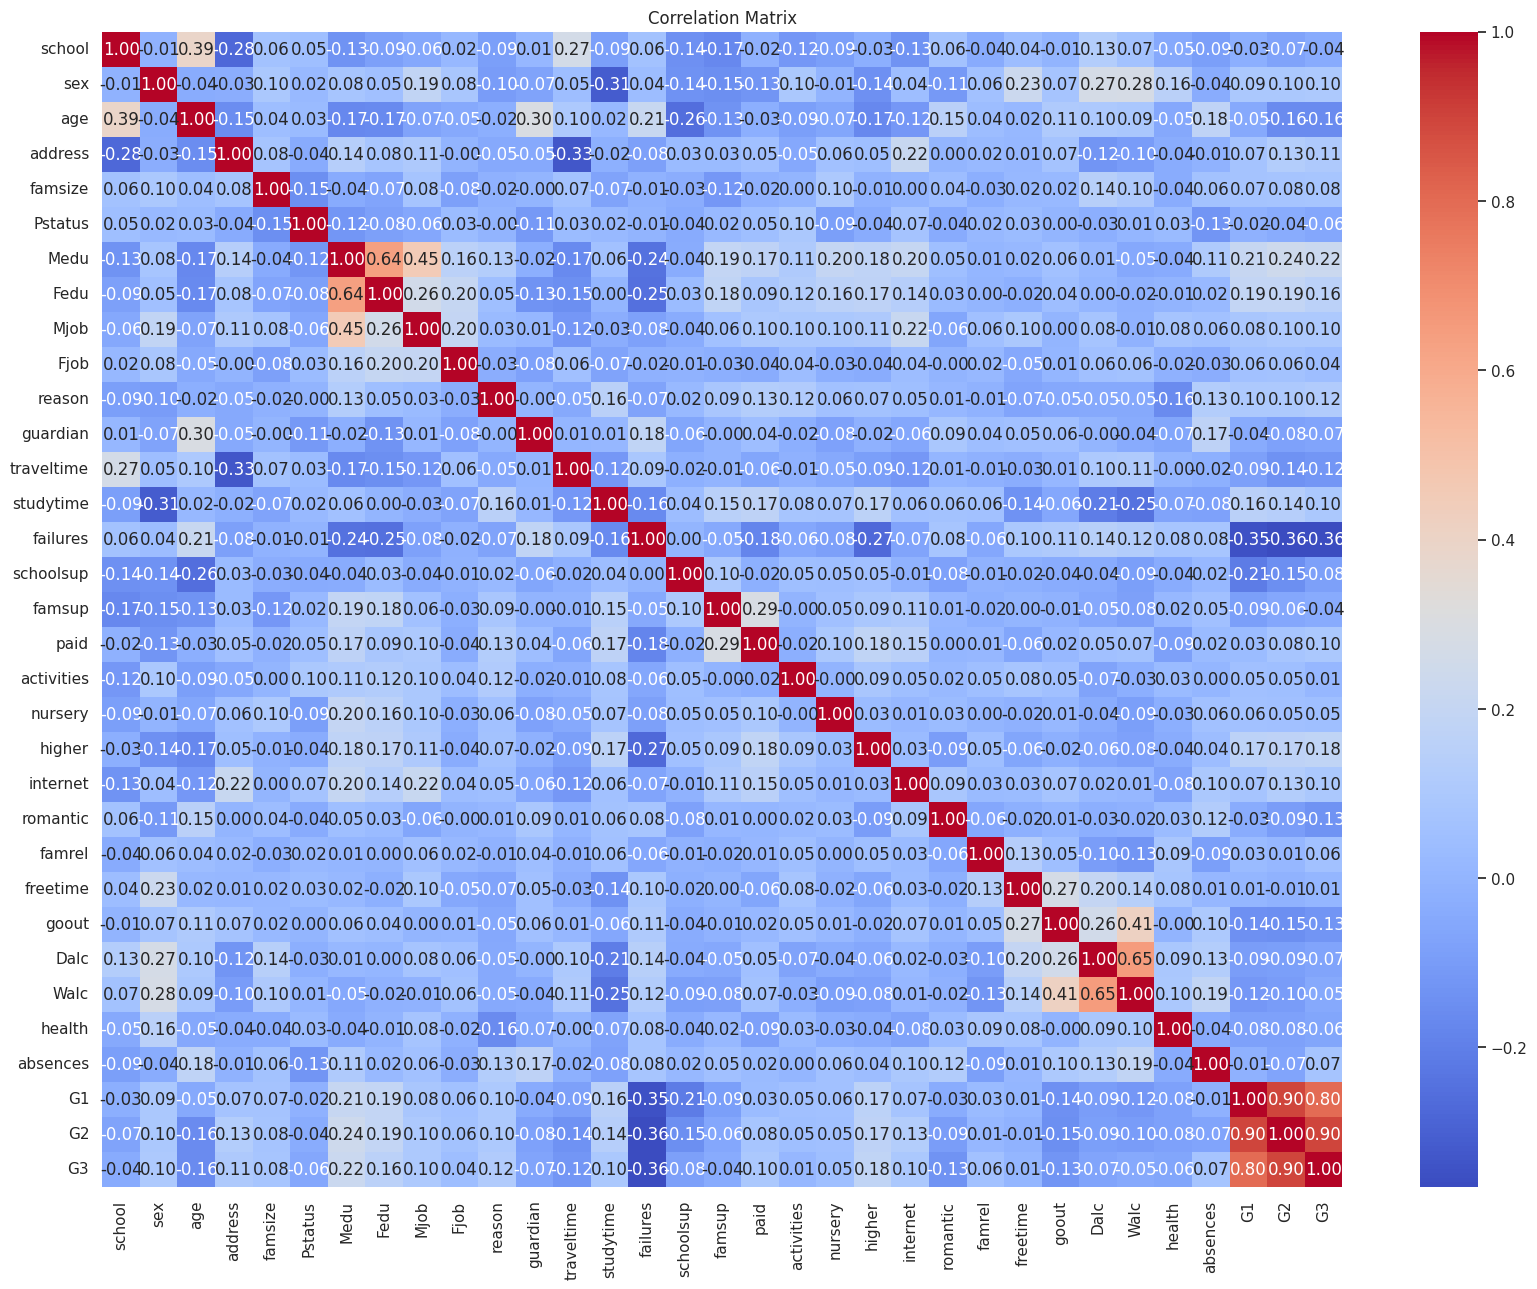

In [9]:
# Calculating correlation matrix
corr_matrix = df.corr()

# Displaying the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Correlation of all features with 'G3'
corr_with_g3 = corr_matrix['G3'].sort_values(ascending=False)
print("Correlation of features with G3:\n", corr_with_g3)


Correlation of features with G3:
 G3            1.000000
G2            0.896367
G1            0.801987
Medu          0.224280
higher        0.180808
Fedu          0.160222
reason        0.118912
address       0.105286
Mjob          0.104343
sex           0.102503
internet      0.098092
studytime     0.097927
paid          0.097775
famsize       0.082700
absences      0.074362
famrel        0.057578
nursery       0.047862
Fjob          0.044482
activities    0.011998
freetime      0.008008
famsup       -0.043887
school       -0.044582
Walc         -0.046742
Pstatus      -0.058690
health       -0.063672
Dalc         -0.066963
guardian     -0.070709
schoolsup    -0.082429
traveltime   -0.121197
goout        -0.128385
romantic     -0.133679
age          -0.158947
failures     -0.361279
Name: G3, dtype: float64


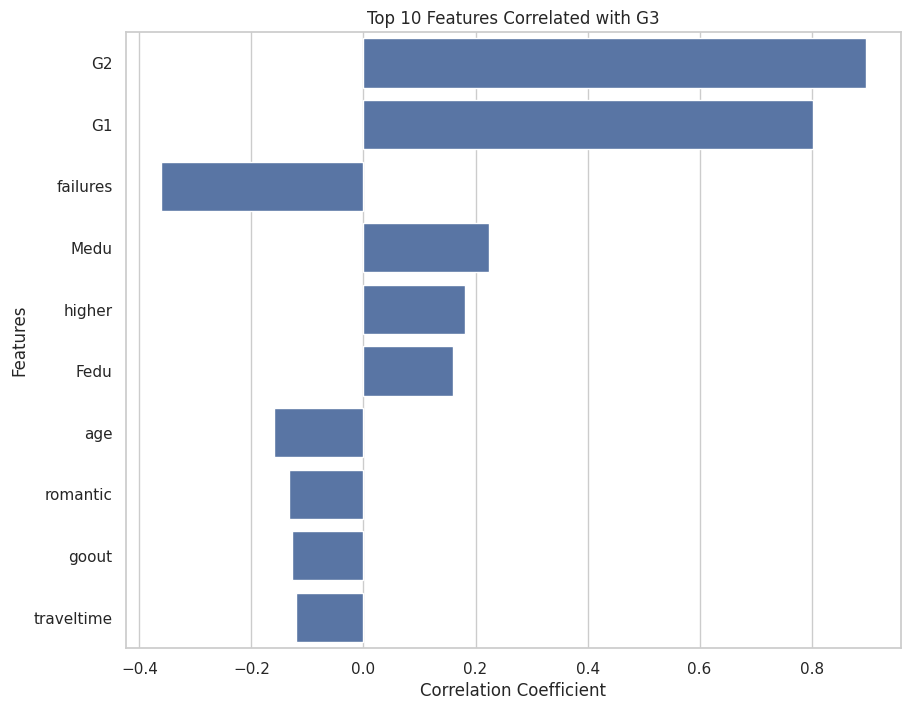

In [11]:
# Selecting top 10 features most correlated with G3
top_features = corr_with_g3.abs().sort_values(ascending=False).index[1:11]  # Exclude G3 itself

# Plotting correlation with G3
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_g3[top_features].values, y=top_features)
plt.title('Top 10 Features Correlated with G3')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


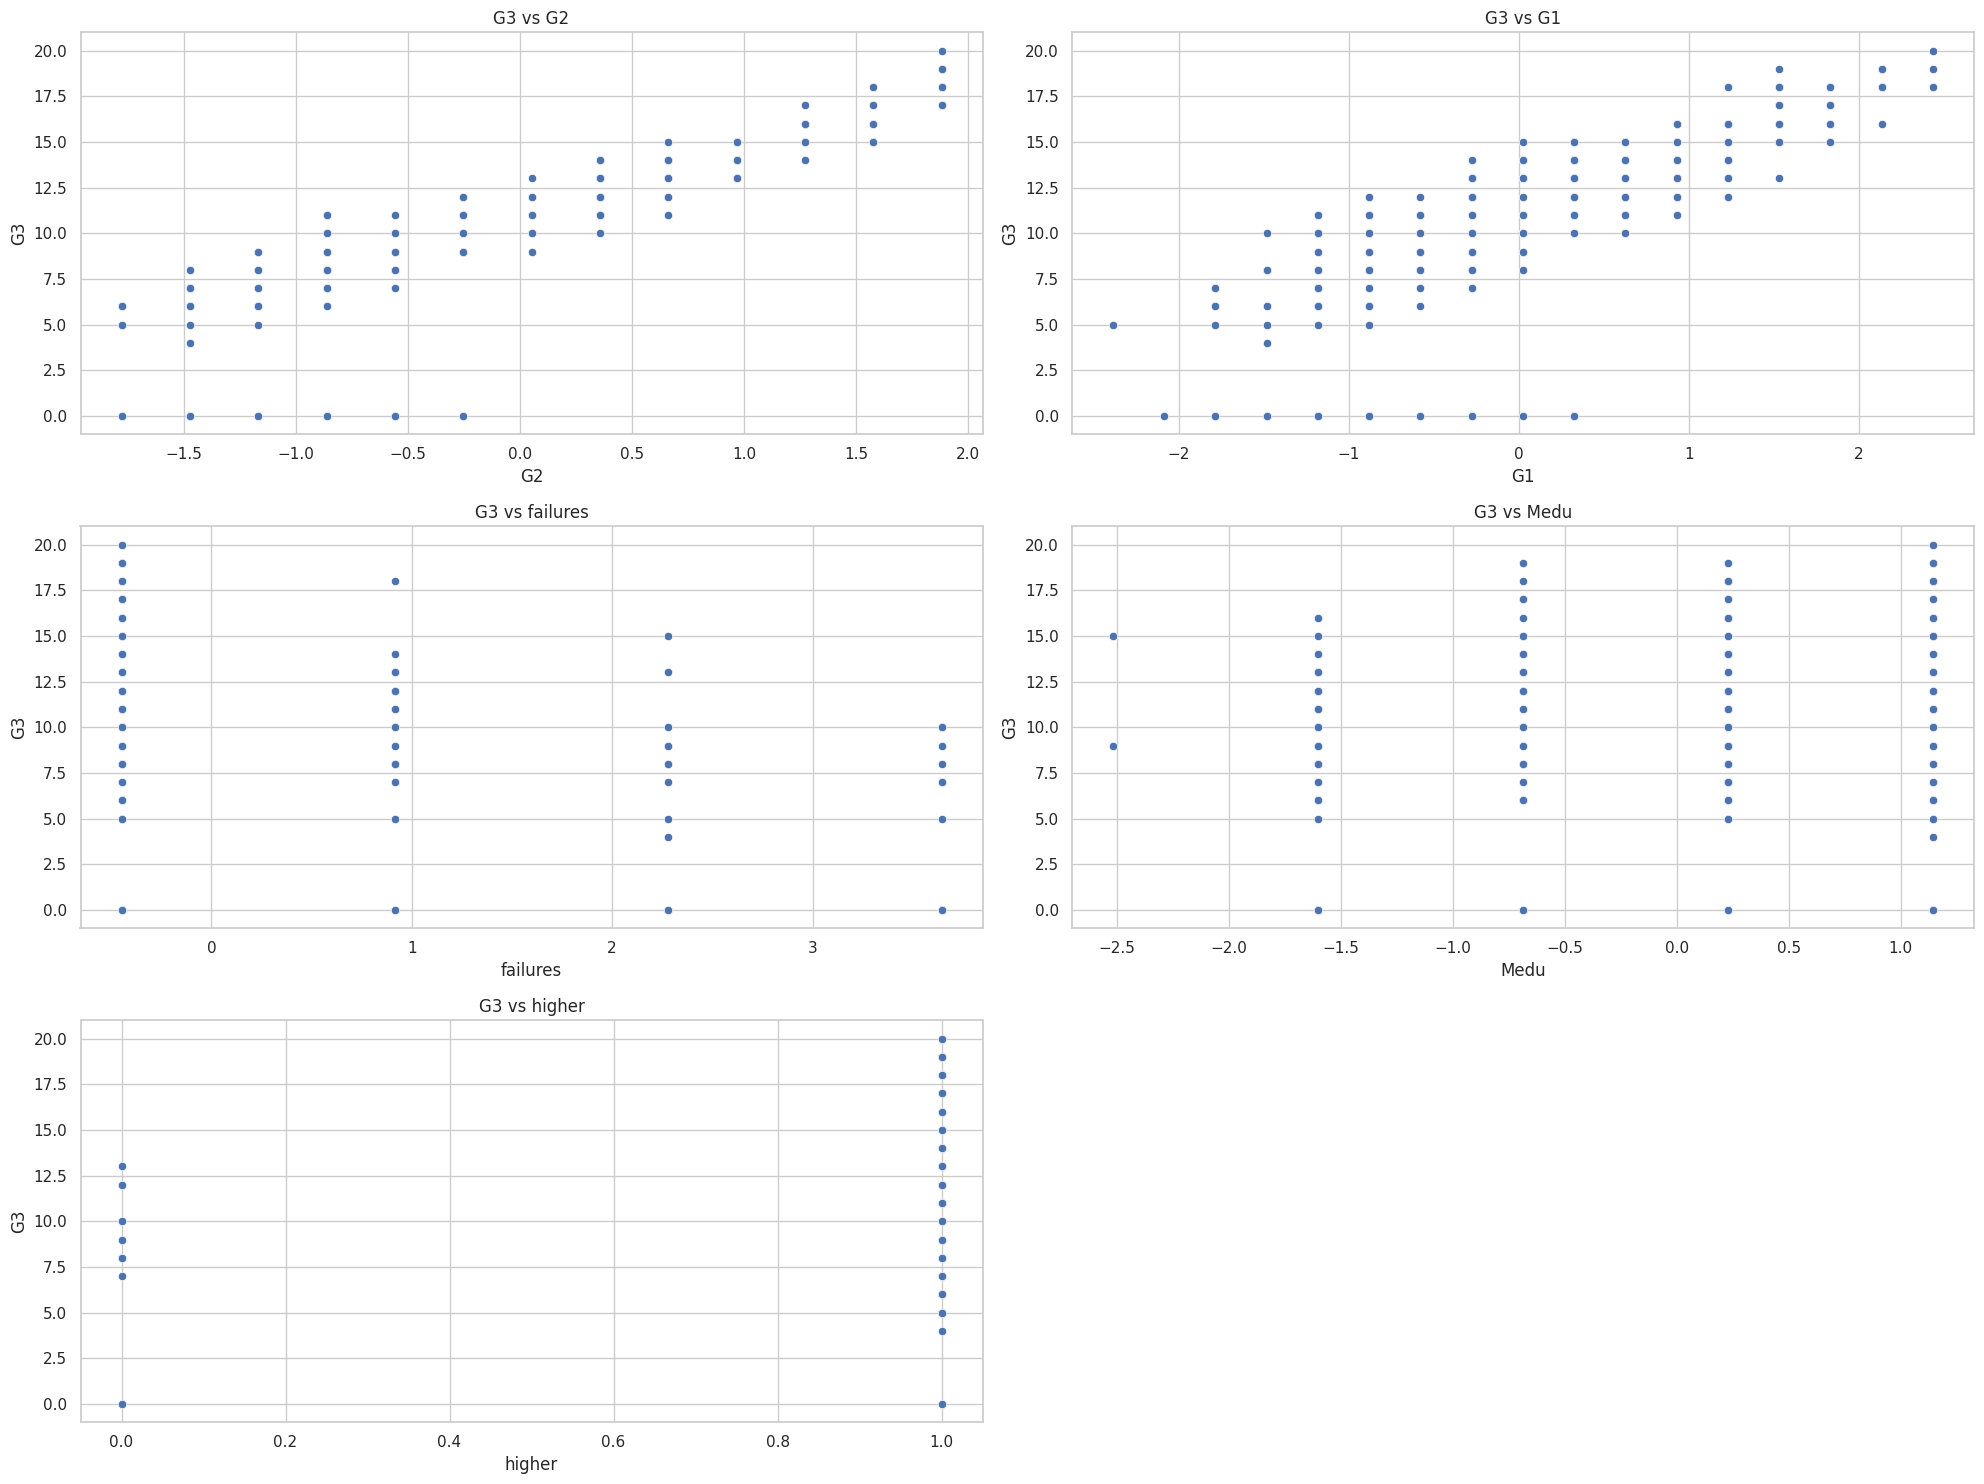

In [12]:
# Selecting top 5 features most correlated with G3
top_5_features = corr_with_g3.abs().sort_values(ascending=False).index[1:6]  # Exclude G3

# Plotting scatter plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(top_5_features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=df[col], y=df['G3'])
    plt.title(f'G3 vs {col}')
    plt.xlabel(col)
    plt.ylabel('G3')
plt.tight_layout()
plt.show()


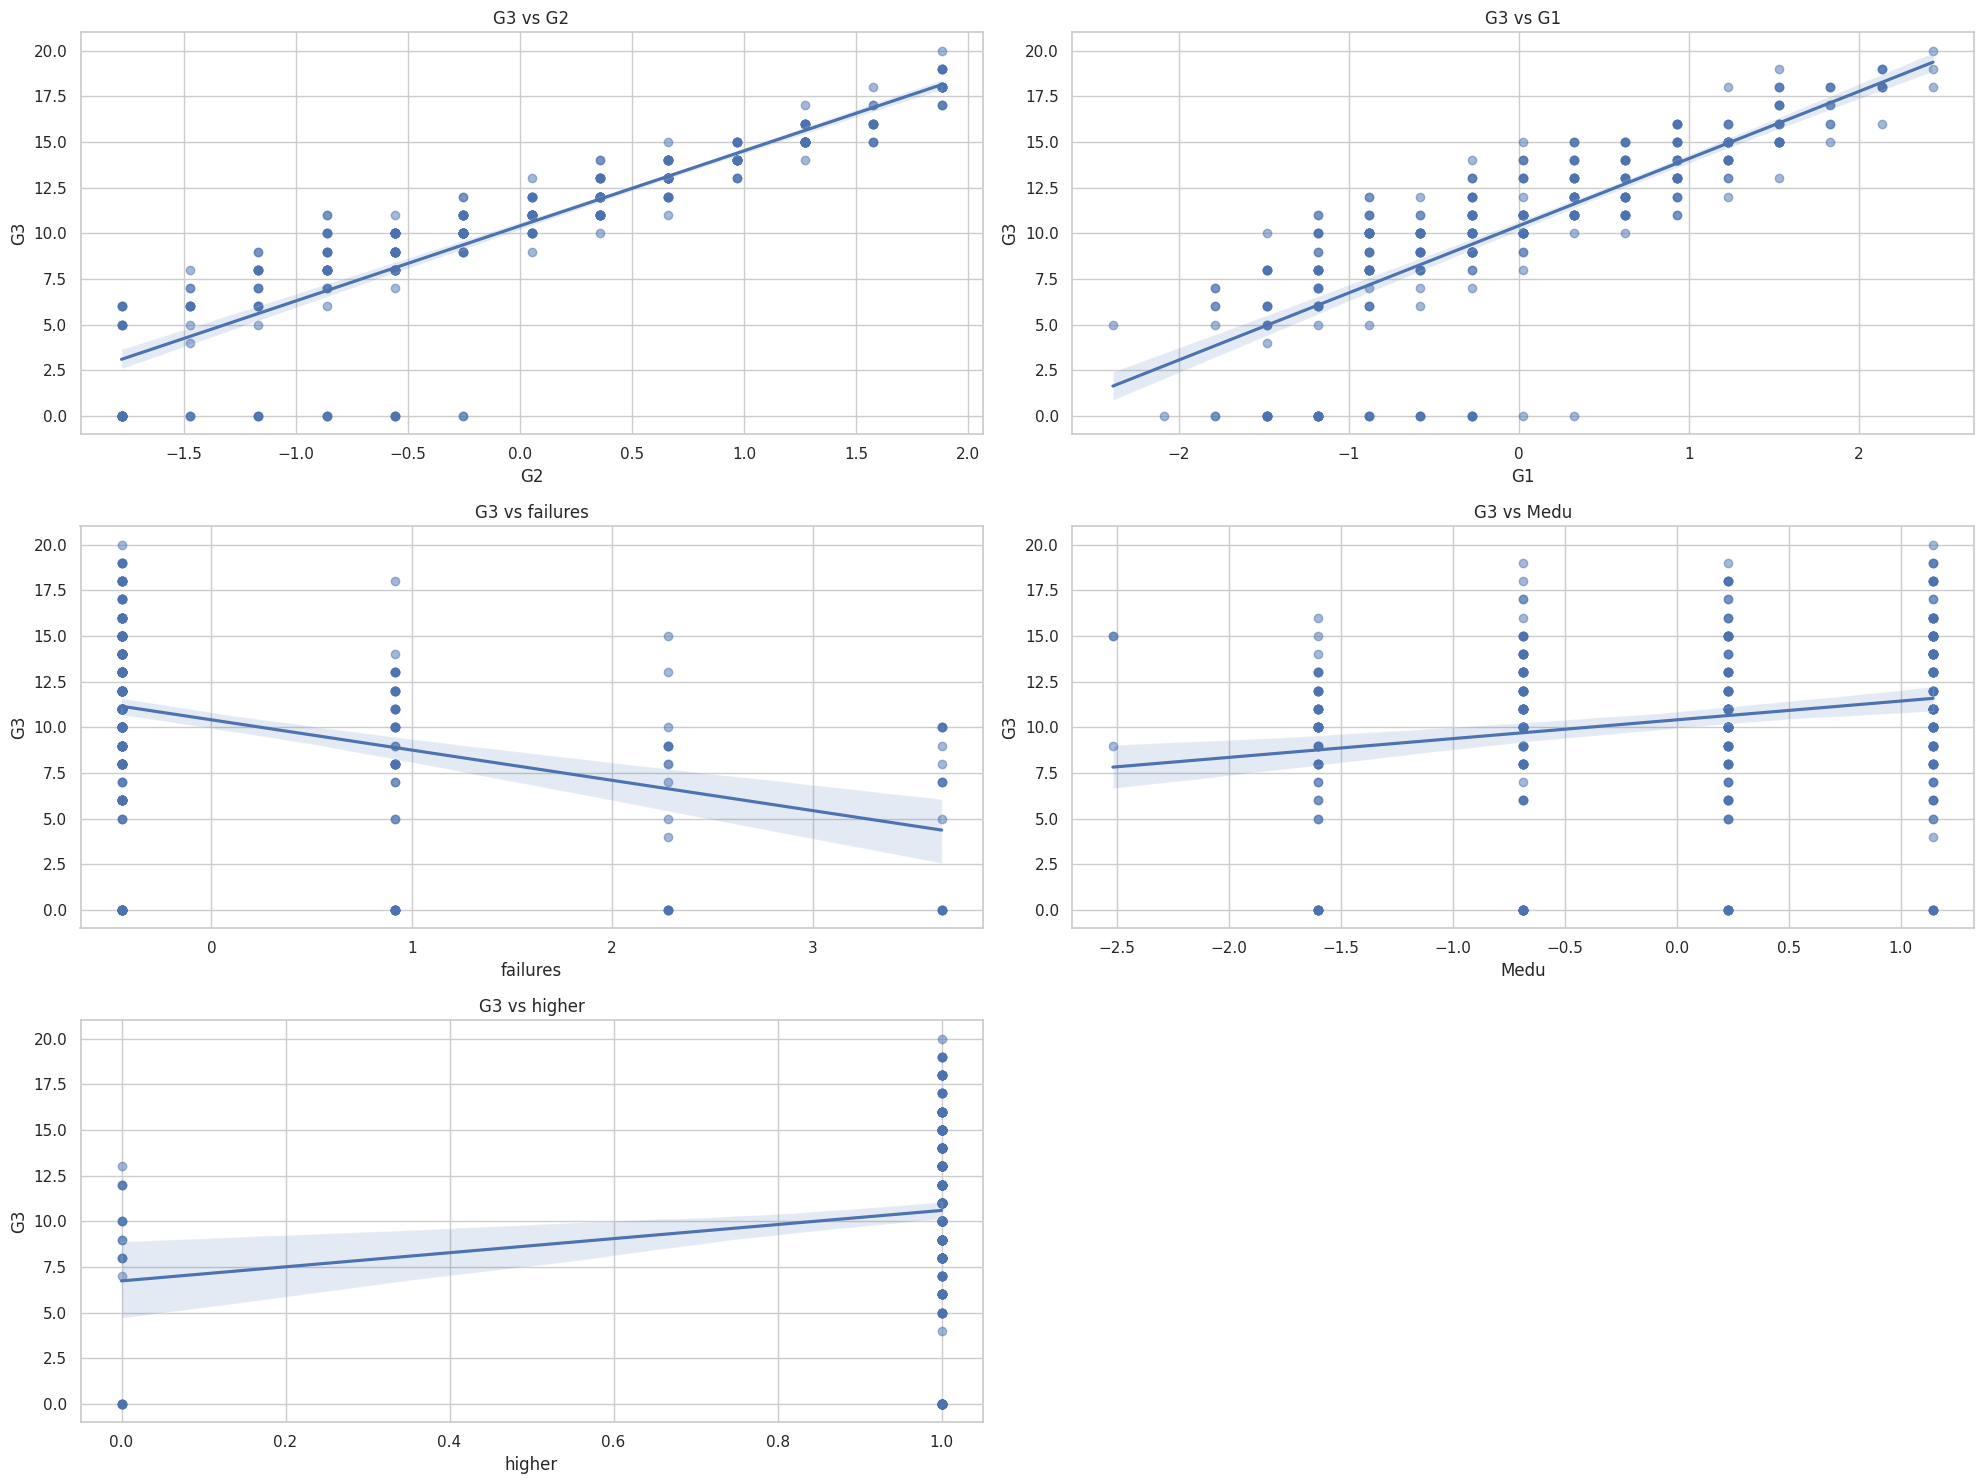

In [13]:
# Plotting scatter plots with regression lines
plt.figure(figsize=(20, 15))
for i, col in enumerate(top_5_features):
    plt.subplot(3, 2, i+1)
    sns.regplot(x=df[col], y=df['G3'], scatter_kws={'alpha':0.5})
    plt.title(f'G3 vs {col}')
    plt.xlabel(col)
    plt.ylabel('G3')
plt.tight_layout()
plt.show()


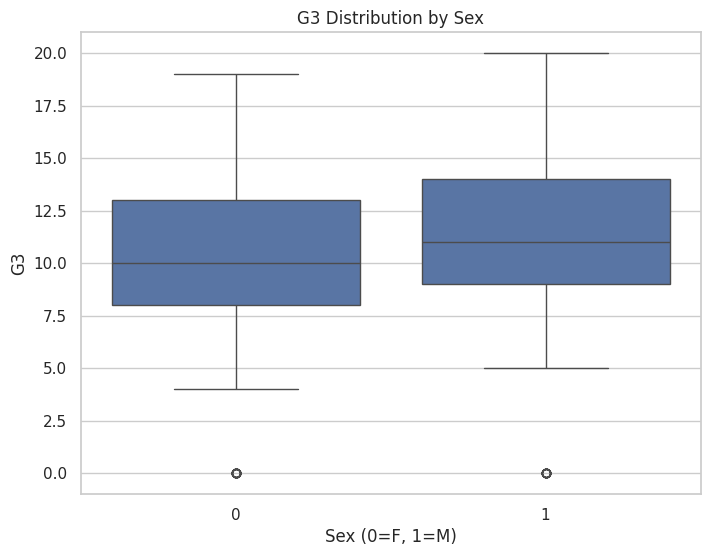

In [14]:
# Assuming 'sex' is encoded (e.g., 0 for F, 1 for M)
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='G3', data=df)
plt.title('G3 Distribution by Sex')
plt.xlabel('Sex (0=F, 1=M)')
plt.ylabel('G3')
plt.show()


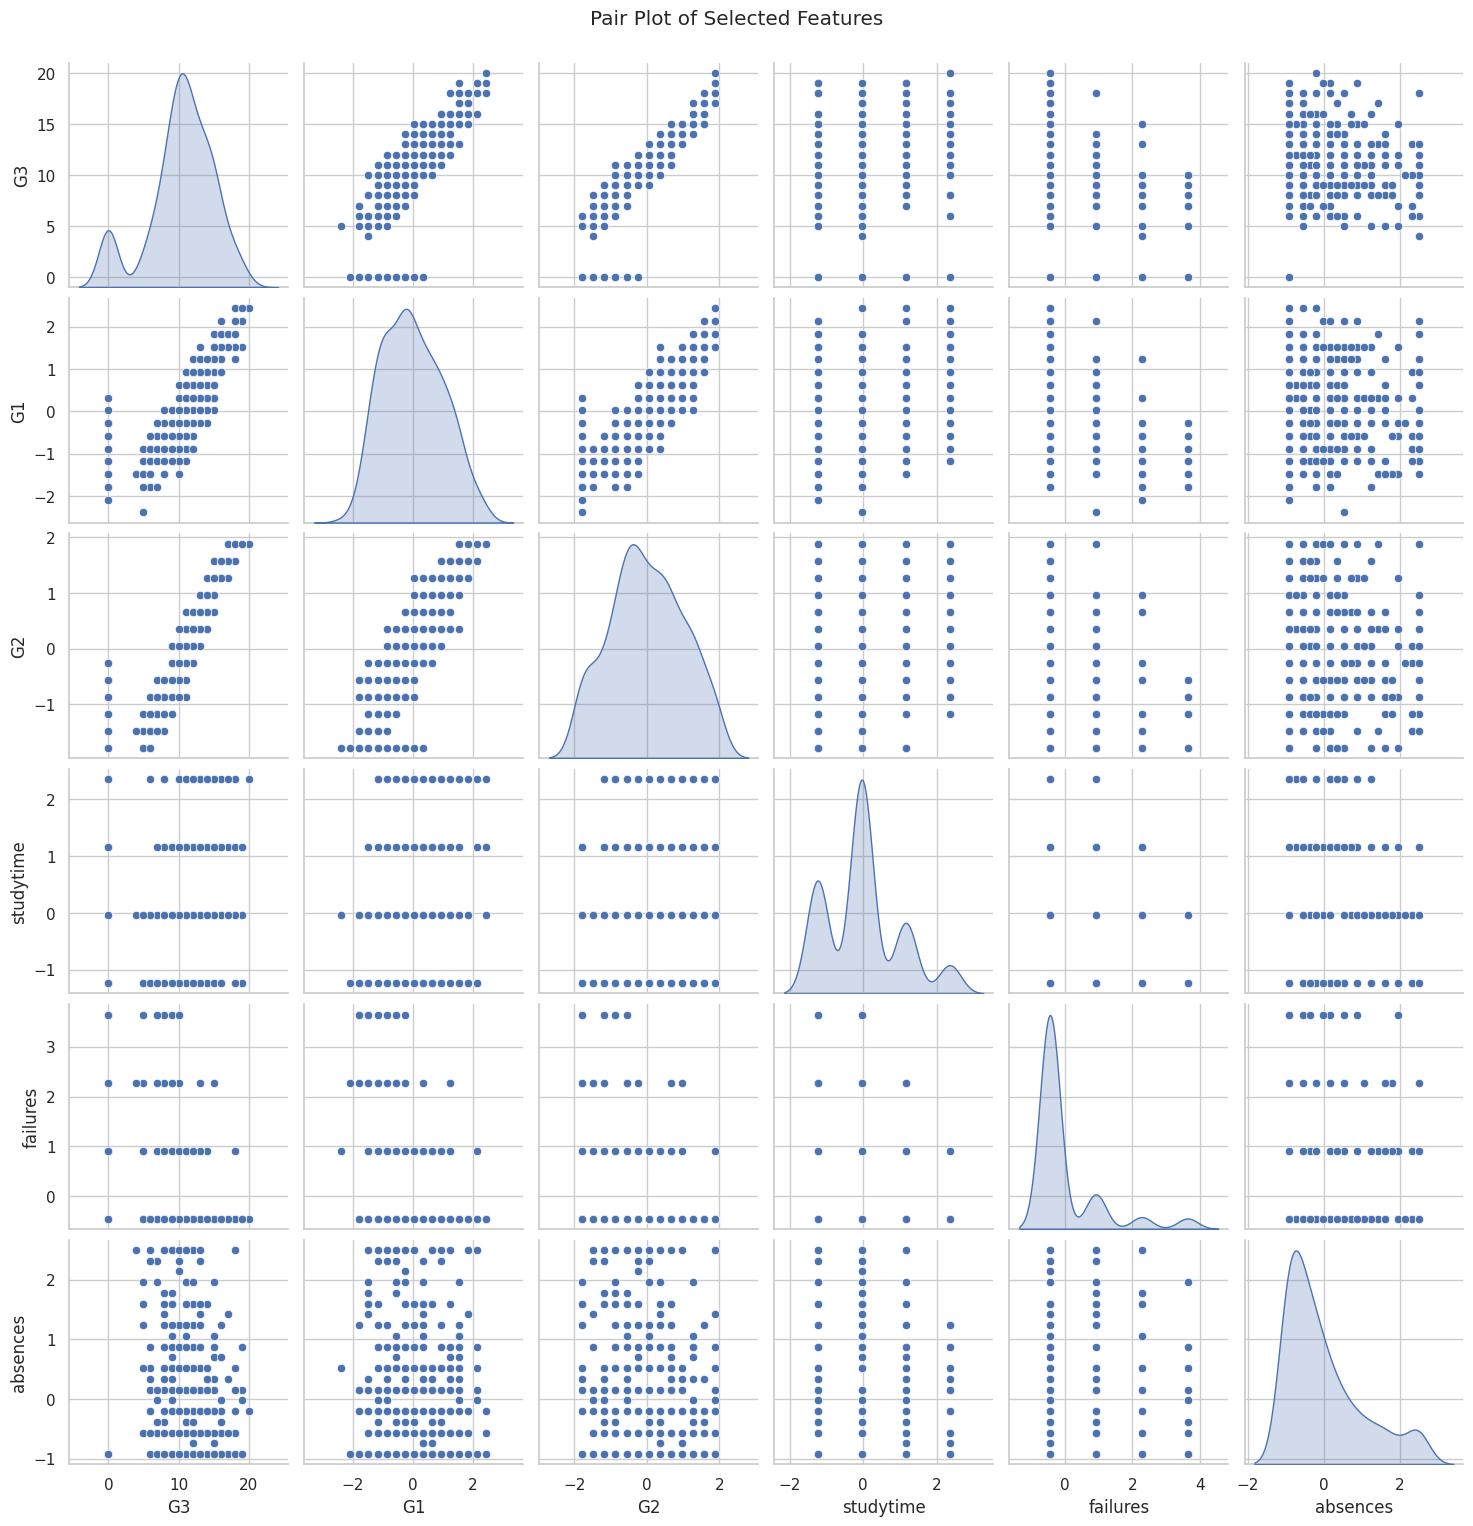

In [15]:
# Selecting a subset of features for the pair plot
subset_features = ['G3', 'G1', 'G2', 'studytime', 'failures', 'absences']

# Creating the pair plot
sns.pairplot(df[subset_features], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


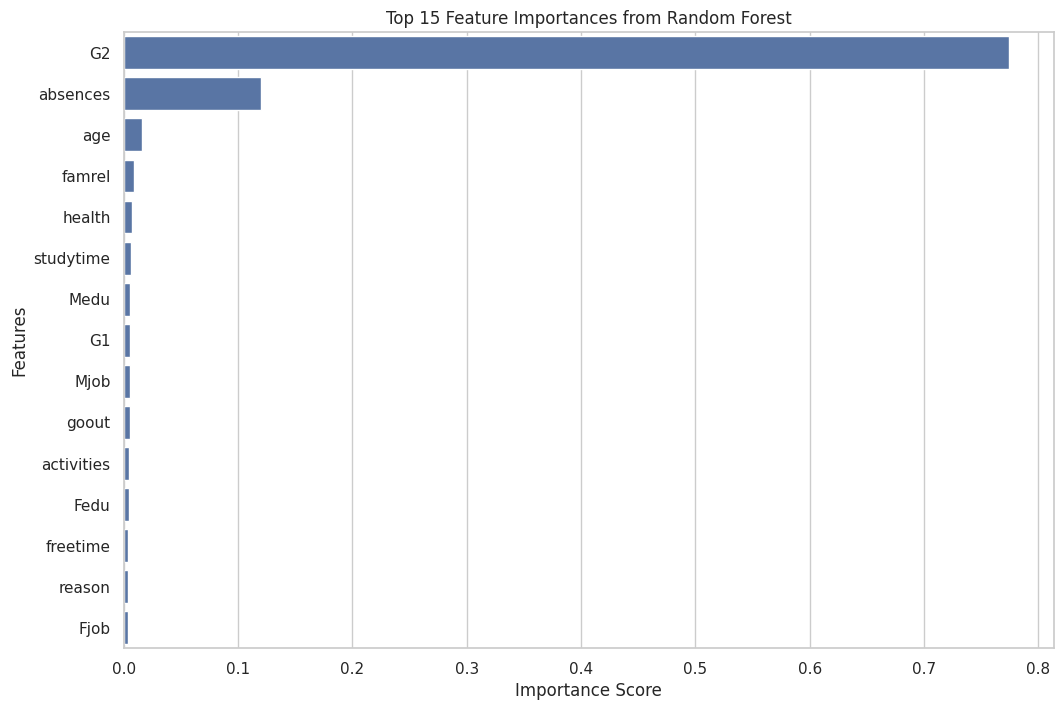

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Defining features and target
X = df.drop('G3', axis=1)
y = df['G3']

# Initializing and training the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extracting feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title('Top 15 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [17]:
# Calculate the average final grade (G3) by gender
average_g3_by_gender = df.groupby('sex')['G3'].mean()
print(average_g3_by_gender)


sex
0     9.966346
1    10.907609
Name: G3, dtype: float64


In [18]:
# Calculate the average final grade (G3) by gender
average_g3_by_gender = df.groupby('sex')['G3'].mean()
print(average_g3_by_gender)


sex
0     9.966346
1    10.907609
Name: G3, dtype: float64


In [19]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Selecting features and target variable
X = df.drop('G3', axis=1)  # Excluding the target variable G3
y = df['G3']

# Convert categorical variables to numerical if not already done (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Fitting the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extracting feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Displaying the most important features
print(feature_importances)


G2            0.774801
absences      0.119754
age           0.015558
famrel        0.008978
health        0.007156
studytime     0.006143
Medu          0.005780
G1            0.005689
Mjob          0.005245
goout         0.005055
activities    0.004700
Fedu          0.004319
freetime      0.003689
reason        0.003548
Fjob          0.003452
Walc          0.003343
failures      0.003134
guardian      0.002503
school        0.002099
sex           0.002079
nursery       0.001850
paid          0.001776
schoolsup     0.001497
romantic      0.001426
traveltime    0.001306
famsize       0.001280
Dalc          0.001201
famsup        0.000733
address       0.000648
internet      0.000465
Pstatus       0.000452
higher        0.000343
dtype: float64


<ipython-input-20-626df57b8b05>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


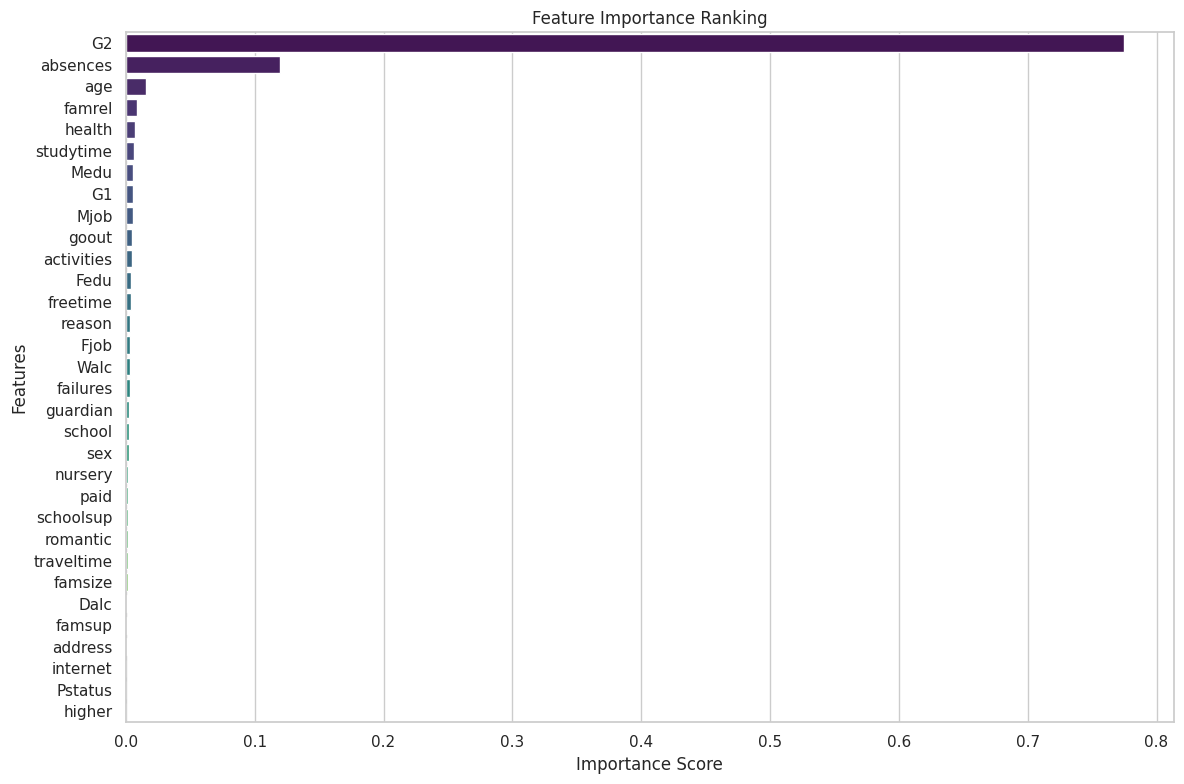

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming X and y are already defined from the previous steps
# Convert categorical variables to numerical if not already done (one-hot encoding)
X = pd.get_dummies(df.drop('G3', axis=1), drop_first=True)
y = df['G3']

# Fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extract feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance Ranking')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [21]:
df.shape()

TypeError: 'tuple' object is not callable

In [22]:
from google.colab import files
uploaded = files.upload()

Saving student-mat-preprocessed.csv to student-mat-preprocessed (1).csv


In [24]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# To display plots inline
%matplotlib inline


# Loading the preprocessed dataset
df = pd.read_csv('student-mat-preprocessed.csv')

df.describe()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,392.000000,392.000000,3.920000e+02,392.000000,392.000000,392.000000,3.920000e+02,3.920000e+02,392.000000,392.000000,...,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,392.000000
mean,0.117347,0.469388,2.900174e-16,0.775510,0.290816,0.895408,-1.812609e-17,-1.993870e-16,2.163265,2.280612,...,-1.778623e-16,-1.223511e-16,5.437827e-17,-8.156741e-17,-1.359457e-17,9.063045e-17,9.063045e-18,1.268826e-16,2.650941e-16,10.408163
std,0.322245,0.499700,1.001278e+00,0.417779,0.454719,0.306418,1.001278e+00,1.001278e+00,1.227926,0.865852,...,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,4.588625
min,0.000000,0.000000,-1.353752e+00,0.000000,0.000000,0.000000,-2.518169e+00,-1.433445e+00,0.000000,0.000000,...,-2.343079e+00,-1.406146e+00,-1.897312e+00,-6.046354e-01,-1.007984e+00,-1.859495e+00,-9.203450e-01,-2.386647e+00,-1.778866e+00,0.000000
25%,0.000000,0.000000,-5.521345e-01,1.000000,0.000000,1.000000,-6.867734e-01,-5.015868e-01,2.000000,2.000000,...,4.260143e-02,-3.081196e-01,-9.968928e-01,-6.046354e-01,-1.007984e+00,-4.117848e-01,-9.203450e-01,-8.791291e-01,-5.587165e-01,8.000000
50%,0.000000,0.000000,2.494830e-01,1.000000,0.000000,1.000000,2.289245e-01,-3.565783e-02,2.000000,2.000000,...,4.260143e-02,-3.081196e-01,-9.647350e-02,-6.046354e-01,-2.270952e-01,3.120701e-01,-2.002347e-01,2.538168e-02,5.135834e-02,11.000000
75%,0.000000,1.000000,1.051101e+00,1.000000,1.000000,1.000000,1.144622e+00,4.302712e-01,3.000000,3.000000,...,1.235442e+00,7.899067e-01,8.039458e-01,8.675204e-01,5.537937e-01,1.035925e+00,5.198755e-01,6.283889e-01,6.614331e-01,14.000000
max,1.000000,1.000000,3.455953e+00,1.000000,1.000000,1.000000,1.144622e+00,1.362129e+00,4.000000,4.000000,...,1.235442e+00,1.887933e+00,1.704365e+00,2.339676e+00,2.115571e+00,1.035925e+00,2.500179e+00,2.437410e+00,1.881583e+00,20.000000


In [2]:
from google.colab import files
uploaded = files.upload()

Saving student-mat-preprocessed.csv to student-mat-preprocessed.csv


In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# To display plots inline
%matplotlib inline


# Loading the preprocessed dataset
df = pd.read_csv('student-mat-preprocessed.csv')


In [4]:
# Checking the shape of the DataFrame
print(df.shape)

(392, 33)


In [5]:
# Install necessary libraries if not already installed
!pip install scikit-learn xgboost lightgbm


In [10]:
# Defining features and target
X = df.drop('G3', axis=1)  # Features (dropping the target column 'G3')
y = df['G3']               # Target (final grade)

# Splitting the dataset into training and testing sets (70% training, 30% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verifying the split
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


KeyError: "['G3'] not found in axis"

In [17]:
# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Verify the column names
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [18]:
# Defining features and target
X = df.drop('G3', axis=1)  # Features (dropping the target column 'G3')
y = df['G3']               # Target (final grade)

# Splitting the dataset into training and testing sets (70% training, 30% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verifying the split
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (274, 32)
Testing Features Shape: (118, 32)
Training Labels Shape: (274,)
Testing Labels Shape: (118,)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 1.4320412040401875
MSE: 3.46451914870102
R2 Score: 0.759430469038554


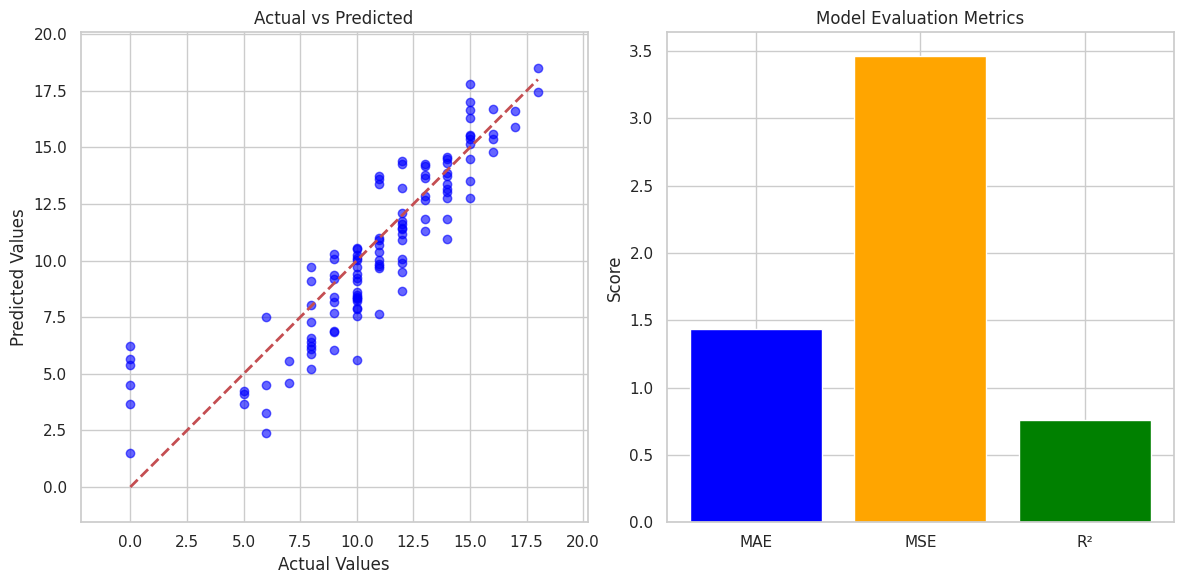

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axis('equal')

# Bar plot of evaluation metrics
plt.subplot(1, 2, 2)
metrics = [mae, mse, r2]
metrics_names = ['MAE', 'MSE', 'R²']
plt.bar(metrics_names, metrics, color=['blue', 'orange', 'green'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # No need to scale for tree-based models

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("\nRandom Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))



Random Forest Performance:
MAE: 0.9799152542372881
MSE: 2.22533813559322
R2 Score: 0.845476809758433


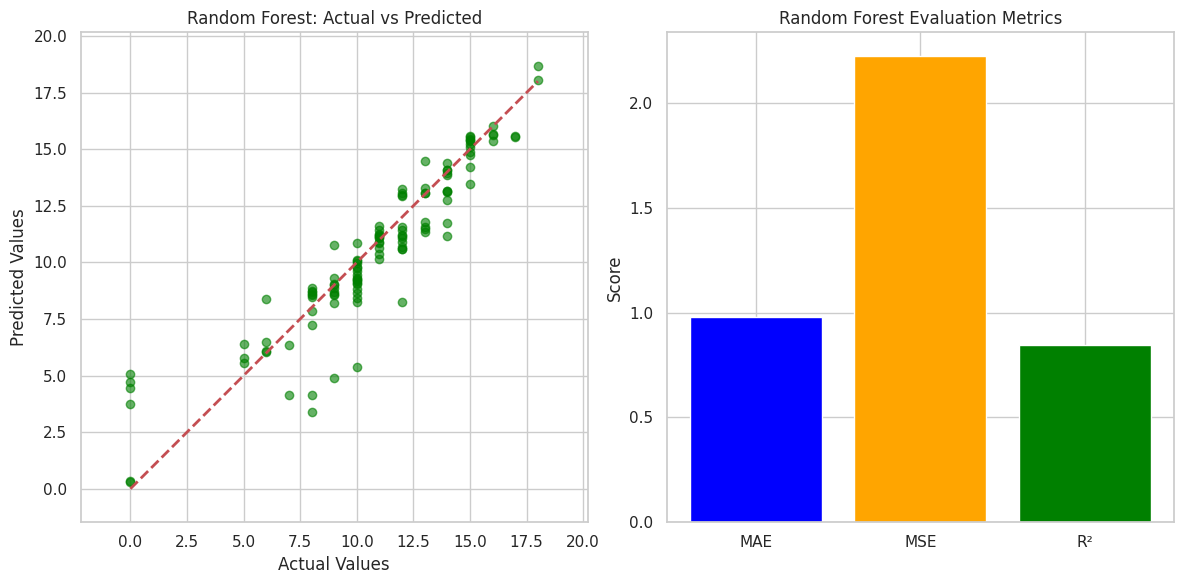

In [25]:
import matplotlib.pyplot as plt

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot: Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axis('equal')

# Bar plot: Evaluation Metrics
plt.subplot(1, 2, 2)
metrics_rf = [mae_rf, mse_rf, r2_rf]
metrics_names_rf = ['MAE', 'MSE', 'R²']
plt.bar(metrics_names_rf, metrics_rf, color=['blue', 'orange', 'green'])
plt.title('Random Forest Evaluation Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [26]:
from xgboost import XGBRegressor

# Gradient Boosting Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("\nXGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))



XGBoost Performance:
MAE: 1.0641374530554828
MSE: 2.5346289925035537
R2 Score: 0.8240002393722534


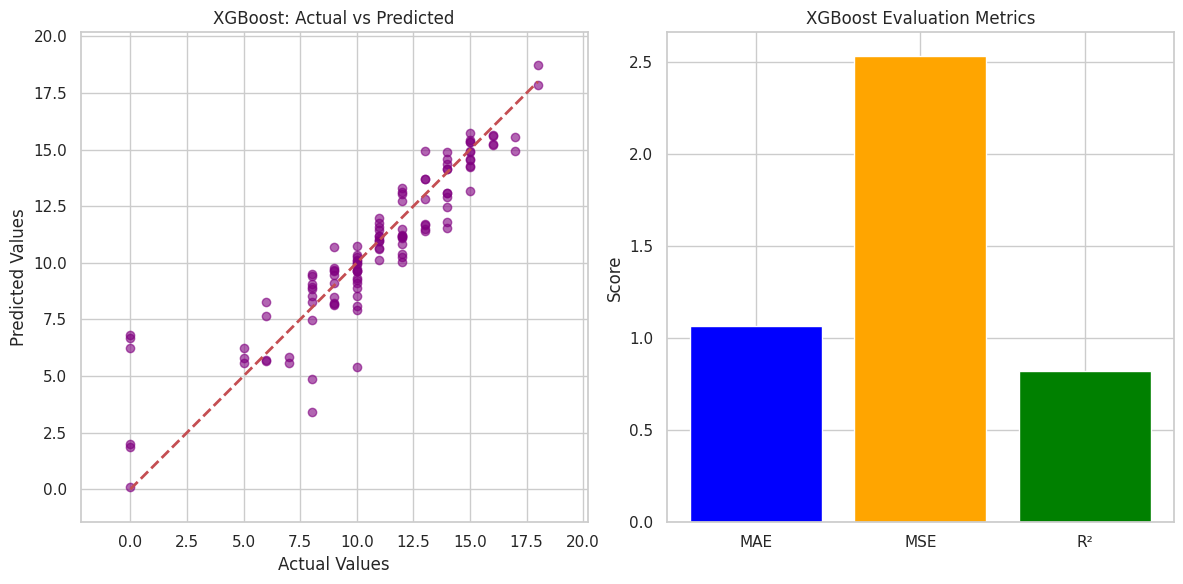

In [27]:
import matplotlib.pyplot as plt

# Evaluation metrics for XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot: Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_xgb, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axis('equal')

# Bar plot: Evaluation Metrics
plt.subplot(1, 2, 2)
metrics_xgb = [mae_xgb, mse_xgb, r2_xgb]
metrics_names_xgb = ['MAE', 'MSE', 'R²']
plt.bar(metrics_names_xgb, metrics_xgb, color=['blue', 'orange', 'green'])
plt.title('XGBoost Evaluation Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [28]:
from sklearn.svm import SVR

# SVR Model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluation
print("\nSupport Vector Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr))



Support Vector Regressor Performance:
MAE: 1.3512943320646178
MSE: 4.818248323781653
R2 Score: 0.6654301247714203


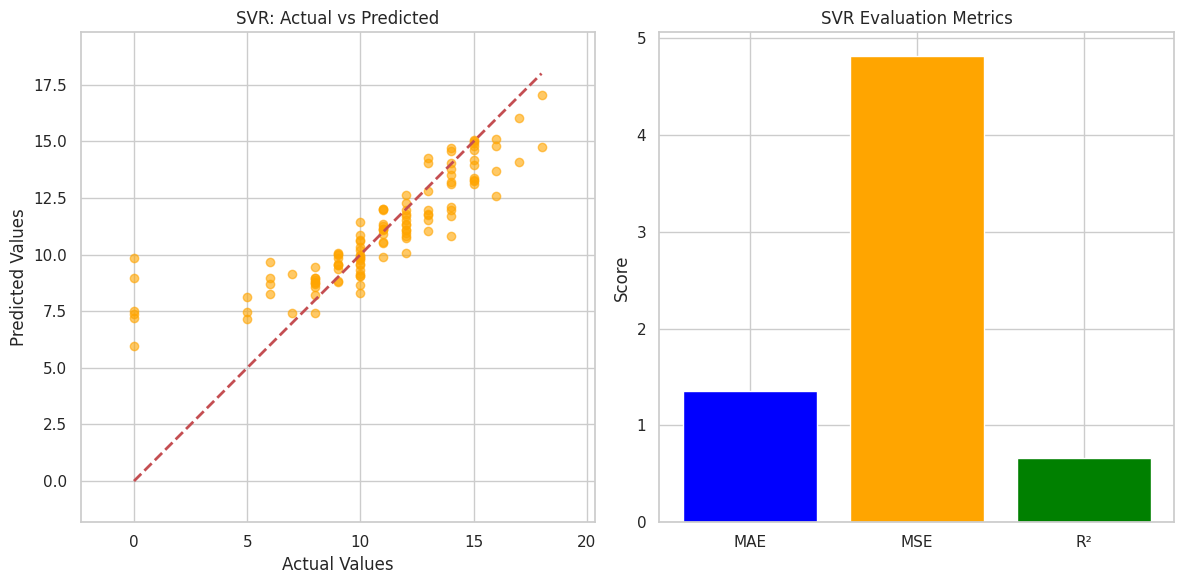

In [29]:
import matplotlib.pyplot as plt

# Evaluation metrics for SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot: Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axis('equal')

# Bar plot: Evaluation Metrics
plt.subplot(1, 2, 2)
metrics_svr = [mae_svr, mse_svr, r2_svr]
metrics_names_svr = ['MAE', 'MSE', 'R²']
plt.bar(metrics_names_svr, metrics_svr, color=['blue', 'orange', 'green'])
plt.title('SVR Evaluation Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()
